## Explaining Thought Process
  The thought process behind the solution was to build a text classification model that could accurately classify abstract samples into different categories. The goal was to explore and preprocess the dataset, train traditional machine learning models, and also build a deep learning model using pre-trained text embeddings. The approach involved several steps such as data preprocessing, feature extraction, model training, evaluation, and visualization.

## Breaking Down the Entire Solution by Different Steps
 -  **Importing Libraries:** The necessary libraries were imported to support the implementation.

 - **Exploring and Preprocessing the Dataset:** The raw dataset was preprocessed by converting it into a dictionary format and then into pandas dataframes. Text cleaning techniques such as removing stopwords, punctuation, and converting numbers to text format were applied. Also stemming or lemmatization can be applied if needed.

 - **Label Distribution Counts:** The distribution of labels in the train, test, and validation sets was analyzed and visualized using count plots.

 - **Training Traditional Machine Learning Models:** The data was converted using TF-IDF vectorization. LabelEncoder was used to encode the categorical target labels. Several traditional machine learning models, such as Naive Bayes, Logistic Regression, and Random Forest, were trained and evaluated. The model with the highest validation accuracy was selected.

 -  **Plotting the Classification Matrix:** The confusion matrix was calculated and plotted to visualize the performance of the best model on the test set.

 -  **Deep Learning Model:** A deep learning model was built using a pre-trained text embedding model from TensorFlow Hub. The model architecture included the text embedding layer, followed by dense layers with activation functions. The model was compiled, trained, and evaluated using accuracy as the metric.

 -  **Plotting Training Loss:** The training loss of the deep learning model was plotted to analyze the model's learning progress over epochs.

 - **Results, Analysis, Visualization, Insights:** The classification report was generated to analyze the performance of the traditional machine learning models and the deep learning model on the test set. The results provided insights into precision, recall, F1-score, and support for each class.


## Results, Analysis, Visualization, Insights
The results of the traditional machine learning models and the deep learning model were presented and analyzed using classification reports and confusion matrices. The classification reports provided precision, recall, F1-score, and support for each class, giving insights into the performance of the models. The confusion matrices visualized the predictions against the true labels, helping to identify any misclassifications or patterns in the model's performance. is worth noting that the class imbalance within the dataset, particularly with the "OBJECTIVE" and "BACKGROUND" classes having fewer samples, might have influenced the overall accuracy.

## Challenges
During the implementation process, I encountered a few challenges that needed to be addressed. Firstly, the size of the dataset was quite large, consisting of 200,000 samples. This posed a computational limitation, To overcome this, I moved to using 20k dataset, which allowed me to carry out the implementation on Google Colab effectively. Additionally, I discovered that the dataset exhibited class imbalance. The classes "OBJECTIVE" and "BACKGROUND" had significantly fewer samples compared to other classes. This class imbalance can affect the model's ability to accurately predict these minority classes

## Other Ideas to Try With
To further enhance the solution, several ideas could be explored:
- Additional preprocessing steps such as handling misspelled words, handling abbreviations, or performing lemmatization could be beneficial. These steps can help improve the quality of the text data and subsequently enhance the model's performance
 - Experimenting with different pre-trained text embedding models to compare their performance.
 - Trying different neural network architectures such as recurrent neural networks (RNNs) or convolutional neural networks (CNNs) for text classification.
 - Augmenting the dataset with additional labeled samples to improve model generalization.
 - Implementing techniques to handle class imbalance, such as oversampling or undersampling.
 - Performing hyperparameter tuning for the models to optimize their performance.
 - Exploring ensemble learning techniques by combining the predictions of multiple models for improved accuracy.


Importing Libraries


In [5]:
# ! pip install tensorflow nltk pandas numpy scikit-learn tensorflow_hub
! pip install num2words

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [6]:
# Importing Libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re
from num2words import num2words
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import tensorflow as tf
import tensorflow_hub as hub
from keras.models import Sequential
from keras.layers import Dense
import numpy as np

### Exploring and preprocessing the dataset
1. **Converting raw format into a dictionary:** Read the raw dataset file and process the data to extract relevant information. Create a dictionary to store the extracted data, where each entry represents a sample from the dataset.

2. **Convert the dictionary into a pandas dataframe:** Once the data is extracted into a dictionary format, convert it into a pandas dataframe. This will provide a structured representation of the data, making it easier to perform further analysis and preprocessing.

3. **Cleaning the text:** Preprocess the text data by removing unnecessary elements such as stopwords, punctuation, and special characters. You can also perform additional text cleaning steps like stemming or lemmatization to normalize the text.

4. **Label distribution counts:** Analyze the distribution of labels in the dataset to understand the class distribution. You can use visualizations like bar plots or countplots to visualize the label distribution and ensure that the dataset is balanced or identify any class imbalance issues.

Preprocessing the raw data to create a pandas datafrmae for further processing

In [7]:
def preprocess_raw_data(filepath):
    """
    Preprocesses the raw data from a file containing abstract samples.

    Args:
        filepath (str): The path to the file containing the raw data.

    Returns:
        list: A list of dictionaries representing the preprocessed abstract samples.
            Each dictionary contains the 'abstract_id', 'abstract_text', and 'target' fields.
    """

    abstract_samples = []

    with open(filepath, 'r') as file:
        lines = file.readlines()

    abstract_id = None
    abstract_data = ''

    i = 0
    for line in lines:
        line = line.strip()

        if line.startswith('###'):
            abstract_id = int(line[3:])  # Extract abstract ID
            abstract_data = ''
            i=i+1

        elif not line:
            abstract_data_split = abstract_data.splitlines()
            
            for abstract_line_number, abstract_line in enumerate(abstract_data_split):
                line_data = {}
                target_split = abstract_line.split('\t')

                line_data = {
                    'abstract_id': abstract_id,
                    'abstract_text': target_split[1].lower(),
                    'target': target_split[0]
                }

                abstract_samples.append(line_data)

        else:
            abstract_data += line + '\n'
            i=i+1

    return abstract_samples


Reading all the train, test and validation samples from the directory and converting to dataframe

In [8]:
# Read train, validation, and test samples
train_samples = preprocess_raw_data('/train.txt')
val_samples = preprocess_raw_data('/dev.txt')
test_samples = preprocess_raw_data('/test.txt')


In [9]:
# Create dataframes from samples

train_df = pd.DataFrame(train_samples)
val_df = pd.DataFrame(val_samples)
test_df = pd.DataFrame(test_samples)

print ("length of training samples :", len(train_df))
print ("length of training samples :", len(val_df))
print ("length of test samples :", len(test_df))



length of training samples : 180040
length of training samples : 30212
length of test samples : 30135


Display the converted dataframe

In [10]:
train_df[:10]

,abstract_id,abstract_text,target
0,24293578,to investigate the efficacy of 6 weeks of dail...,OBJECTIVE
1,24293578,a total of 125 patients with primary knee oa w...,METHODS
2,24293578,outcome measures included pain reduction and i...,METHODS
3,24293578,pain was assessed using the visual analog pain...,METHODS
4,24293578,secondary outcome measures included the wester...,METHODS
5,24293578,"serum levels of interleukin 1 ( il-1 ) , il-6 ...",METHODS
6,24293578,there was a clinically relevant reduction in t...,RESULTS
7,24293578,the mean difference between treatment arms ( 9...,RESULTS
8,24293578,"further , there was a clinically relevant redu...",RESULTS
9,24293578,these differences remained significant at 12 w...,RESULTS


Further cleaning removing stopwords, puntutations and converting numbers to text format

In [11]:
nltk.download('stopwords')
nltk.download('wordnet')

stop = stopwords.words('english')
stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()

def clean_text(column, use_stemming=False, use_lemmatization=False):
    """
    Cleans the text in a given column by removing digits, punctuation, stopwords, and extra whitespace.
    Optionally applies stemming or lemmatization to the cleaned text.

    Args:
        column: The column containing the text data to be cleaned.
        use_stemming (bool): Whether to apply stemming to the cleaned text. Default is False.
        use_lemmatization (bool): Whether to apply lemmatization to the cleaned text. Default is False.

    Returns:
        The cleaned text column.

    """
    # Define a regular expression pattern to match digits
    pattern = r'\d+'

    # Function to replace matched digits with their text format
    def replace_digits(match):
        return num2words(int(match.group(0)))

    # Apply digit conversion and remove punctuation, stopwords, and extra whitespace
    column = column.apply(lambda x: re.sub(pattern, replace_digits, x))
    column = column.apply(lambda x: re.sub(r'\d+|\%|\W+', ' ', x))
    column = column.apply(lambda x: ' '.join([word for word in x.split() if word not in stop]))

    # Apply stemming or lemmatization
    if use_stemming:
        column = column.apply(lambda x: ' '.join([stemmer.stem(word) for word in x.split()]))
    elif use_lemmatization:
        column = column.apply(lambda x: ' '.join([lemmatizer.lemmatize(word) for word in x.split()]))


    return column

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [12]:
 
# Apply cleaning with stemming
# use_stemming = True to use stemming
# use_lemmatization =  True to use lemmatization
train_df['abstract_text'] = clean_text(train_df['abstract_text'])
val_df['abstract_text'] = clean_text(val_df['abstract_text'])
test_df['abstract_text'] = clean_text(test_df['abstract_text'])


Plots showing distribution of labels in all the train, test and validation

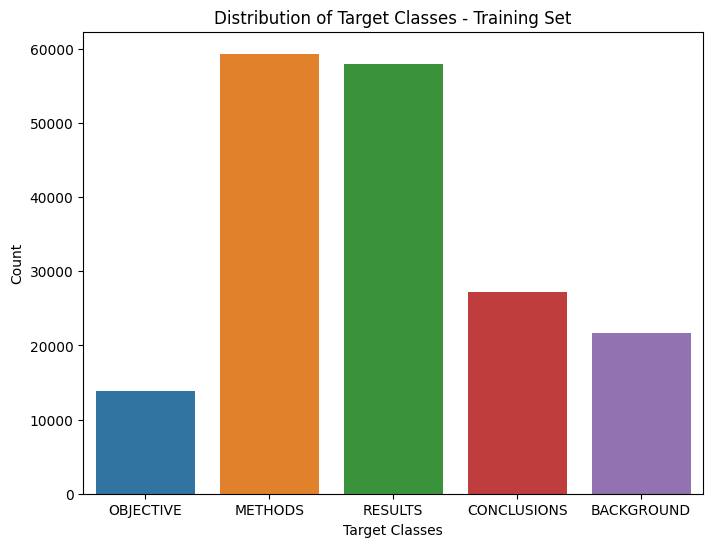

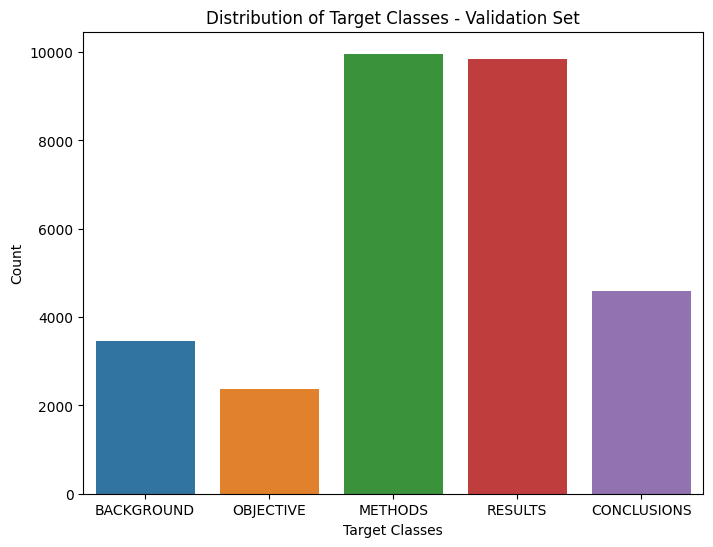

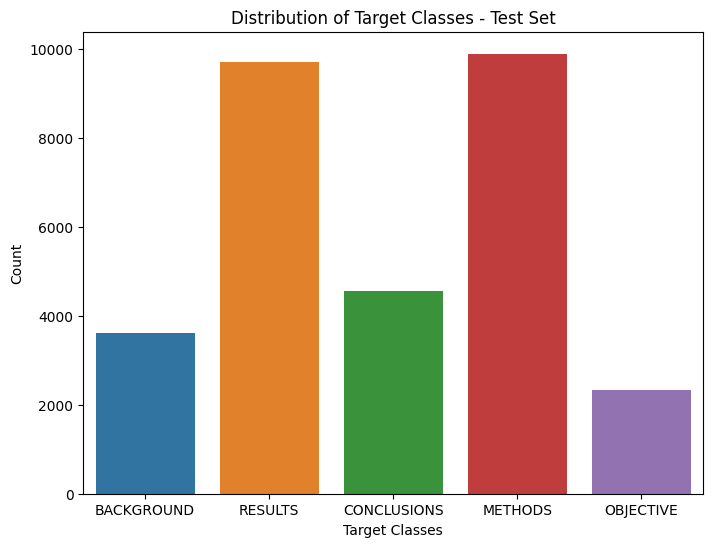

In [13]:
# Display label distribution counts

# Set the figure size
plt.figure(figsize=(8, 6))

# Plot the count of target classes for the training set
sns.countplot(x=train_df["target"])
plt.title("Distribution of Target Classes - Training Set")
plt.xlabel("Target Classes")
plt.ylabel("Count")
plt.show()

# Set the figure size
plt.figure(figsize=(8, 6))

# Plot the count of target classes for the validation set
sns.countplot(x=val_df["target"])
plt.title("Distribution of Target Classes - Validation Set")
plt.xlabel("Target Classes")
plt.ylabel("Count")
plt.show()

# Set the figure size
plt.figure(figsize=(8, 6))

# Plot the count of target classes for the test set
sns.countplot(x=test_df["target"])
plt.title("Distribution of Target Classes - Test Set")
plt.xlabel("Target Classes")
plt.ylabel("Count")
plt.show()


Training the traditional machine learning models and picking the best one based on validation accuracy

In [ ]:
import tensorflow as tf
tf.test.gpu_device_name()

'/device:GPU:0'

### Traditional machine learning models 
   1. Convert the data using TfidfVectorizer
      - **Tokenization:** It breaks the text into individual words or terms (also known as tokens).
      - **Counting:** It counts the occurrence of each word in each document.
      - **TF-IDF computation:** It computes the TF-IDF value for each word in each document.
      - **Normalization:** It scales the TF-IDF values to have unit length.

2. **LabelEncoder:** It is used for encoding categorical target labels with numerical values
3. Training the model and selecting best one using the validation accuracy.
4. Plotting the classification matrix sentence. 
5. Predicting the label using new sentence.

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report




label_encoder = LabelEncoder()

train_sentences = train_df['abstract_text']
train_labels = label_encoder.fit_transform(train_df['target'])

val_sentences = val_df['abstract_text']
val_labels = label_encoder.transform(val_df['target'])

test_sentences = test_df['abstract_text']
test_labels = label_encoder.transform(test_df['target'])


# Feature extraction using TF-IDF
tfidf = TfidfVectorizer()
train_features = tfidf.fit_transform(train_sentences)
val_features = tfidf.transform(val_sentences)
test_features = tfidf.transform(test_sentences)  # Use transform instead of fit_transform



# Define the models
models = {
    # 'SVM': SVC(kernel='linear'),
    'Naive Bayes': MultinomialNB(),
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Random Forest': RandomForestClassifier()
}

best_model = None
best_accuracy = 0.0


In [ ]:
# Train and evaluate each model
for model_name, model in models.items():
    model.fit(train_features, train_labels)
    val_predictions = model.predict(val_features)
    accuracy = sum(val_predictions == val_labels) / len(val_labels)
    
    print(f'{model_name} Accuracy: {accuracy}')


    # Update the best model if a higher accuracy is achieved
    if accuracy > best_accuracy:
        best_model = model
        best_accuracy = accuracy

Naive Bayes Accuracy: 0.7155765920826161
Logistic Regression Accuracy: 0.781378260293923


In [ ]:
# Final evaluation using the best model
test_predictions = best_model.predict(test_features)
print('\nBest Model:')
print(classification_report(test_labels, test_predictions))


Best Model:
              precision    recall  f1-score   support

           0       0.61      0.59      0.60      3621
           1       0.69      0.68      0.68      4571
           2       0.83      0.89      0.86      9897
           3       0.64      0.48      0.55      2333
           4       0.86      0.85      0.85      9713

    accuracy                           0.78     30135
   macro avg       0.72      0.70      0.71     30135
weighted avg       0.77      0.78      0.77     30135



In [ ]:
label_encoder.inverse_transform(test_labels)

array(['BACKGROUND', 'RESULTS', 'RESULTS', ..., 'RESULTS', 'RESULTS',
       'CONCLUSIONS'], dtype=object)

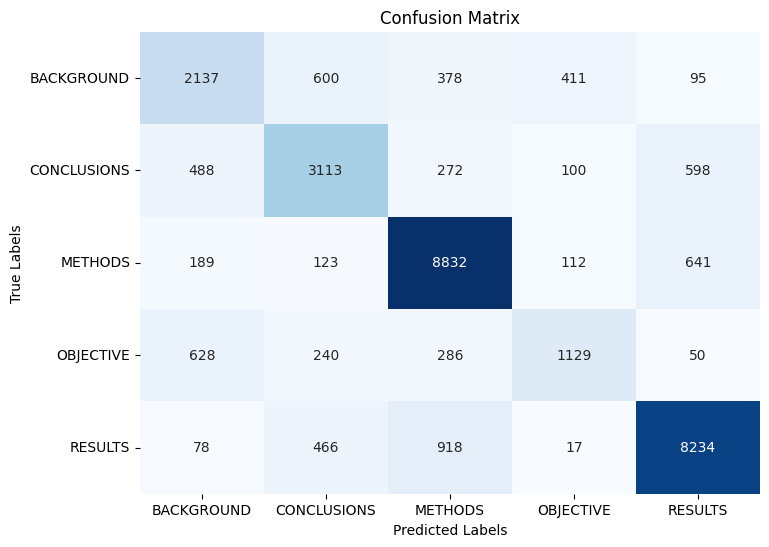

In [ ]:
# Convert the label indices back to label names
decoded_test_labels = label_encoder.inverse_transform(test_labels)
decoded_test_predictions = label_encoder.inverse_transform(test_predictions)

# Get the unique label names
label_names = label_encoder.classes_

# Calculate the confusion matrix
conf_matrix = confusion_matrix(decoded_test_labels, decoded_test_predictions)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=label_names, yticklabels=label_names)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

In [ ]:
# Preprocess the new sentence
new_sentence = "In our cohort of patients , the use of SA was associated with reduced duration of MV and lengths of stay compared with DIS"
preprocessed_sentence = ' '.join([word for word in new_sentence.split() if word not in stop])

# Transform the preprocessed sentence into features
new_features = tfidf.transform([preprocessed_sentence])

# Use the trained model for prediction
predicted_label = best_model.predict(new_features)

# Decode the predicted label
print(predicted_label)
predicted_class = label_encoder.inverse_transform(predicted_label)

print(f"Predicted Class: {predicted_class}")

[1]
Predicted Class: ['CONCLUSIONS']


### Deep Learning Model

Load the text embedding model:

1. The hub.load() function is used to load the text embedding model from TensorFlow Hub.
The model being loaded in this case is "nnlm-en-dim50/2", which is a pre-trained model trained on English text data with 50-dimensional word embeddings.
Define the deep learning model:

2. The Sequential() function from the Keras library is used to define a sequential model, which is a linear stack of layers.
  - The first layer of the model is a hub.KerasLayer that takes the loaded text embedding model as input. This layer acts as an interface between the pre-trained text embedding model and the rest of the deep learning model.
  - The input_shape=[] argument specifies that the input to the model is a variable-length sequence of text data.
  - The dtype=tf.string argument specifies that the input data type is a string.
  - The trainable=True argument indicates that the text embedding model should be fine-tuned during training.
  - After the hub.KerasLayer, two additional layers are added to the model using the add() function from the Sequential model:
      - The second layer is a Dense layer with 64 units and the 'relu' activation function.
      - The third layer is another Dense layer with 32 units and the 'relu' activation function.
      - The fourth and final layer is a Dense layer with a number of units equal to the number of classes in the dataset (obtained from len(label_encoder.classes_)). This layer uses the 'softmax' activation function, which is commonly used for multi-class classification problems.

In [ ]:
import tensorflow as tf
import tensorflow_hub as hub
from keras.models import Sequential
from keras.layers import Dense
import matplotlib.pyplot as plt
import numpy as np

# Load the text embedding model from TensorFlow Hub
embed = hub.load("https://tfhub.dev/google/nnlm-en-dim50/2")

# Define the deep learning model
model = Sequential()
model.add(hub.KerasLayer(embed, input_shape=[], dtype=tf.string, trainable=True))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(len(label_encoder.classes_), activation='softmax'))

# Compile the model
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
history = model.fit(train_sentences, train_labels, validation_data=(val_sentences, val_labels), epochs=10, batch_size=32)


Epoch 1/10
5627/5627 [==============================] - 146s 26ms/step - loss: 0.6373 - accuracy: 0.7600 - val_loss: 0.5628 - val_accuracy: 0.7901
Epoch 2/10
5627/5627 [==============================] - 101s 18ms/step - loss: 0.4764 - accuracy: 0.8255 - val_loss: 0.5645 - val_accuracy: 0.7921
Epoch 3/10
5627/5627 [==============================] - 100s 18ms/step - loss: 0.3880 - accuracy: 0.8585 - val_loss: 0.6019 - val_accuracy: 0.7871
Epoch 4/10
5627/5627 [==============================] - 99s 18ms/step - loss: 0.3125 - accuracy: 0.8879 - val_loss: 0.6664 - val_accuracy: 0.7850
Epoch 5/10
5627/5627 [==============================] - 100s 18ms/step - loss: 0.2422 - accuracy: 0.9144 - val_loss: 0.7909 - val_accuracy: 0.7761
Epoch 6/10
5627/5627 [==============================] - 99s 18ms/step - loss: 0.1819 - accuracy: 0.9364 - val_loss: 0.9467 - val_accuracy: 0.7670
Epoch 7/10
5627/5627 [==============================] - 99s 18ms/step - loss: 0.1350 - accuracy: 0.9537 - val_loss: 1.15

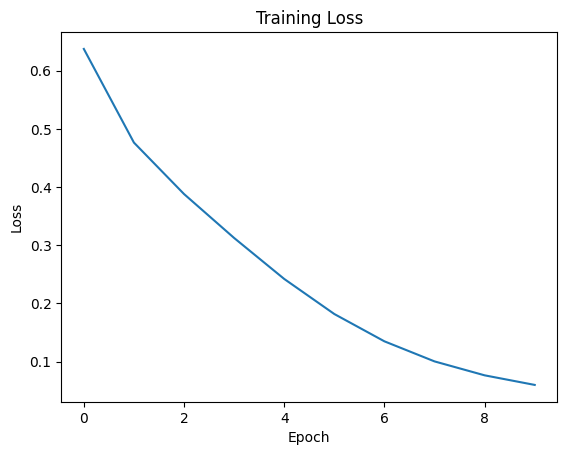

In [ ]:
# Plot the training loss
plt.plot(history.history['loss'])
plt.title('Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

In [ ]:

# Evaluate the model on the test set
test_predictions = np.argmax(model.predict(test_sentences), axis=1)
print('\nModel Evaluation:')
print(classification_report(test_labels, test_predictions))

942/942 [==============================] - 4s 4ms/step

Model Evaluation:
              precision    recall  f1-score   support

           0       0.54      0.57      0.55      3621
           1       0.66      0.59      0.62      4571
           2       0.83      0.86      0.84      9897
           3       0.50      0.47      0.48      2333
           4       0.83      0.84      0.83      9713

    accuracy                           0.75     30135
   macro avg       0.67      0.66      0.67     30135
weighted avg       0.74      0.75      0.74     30135



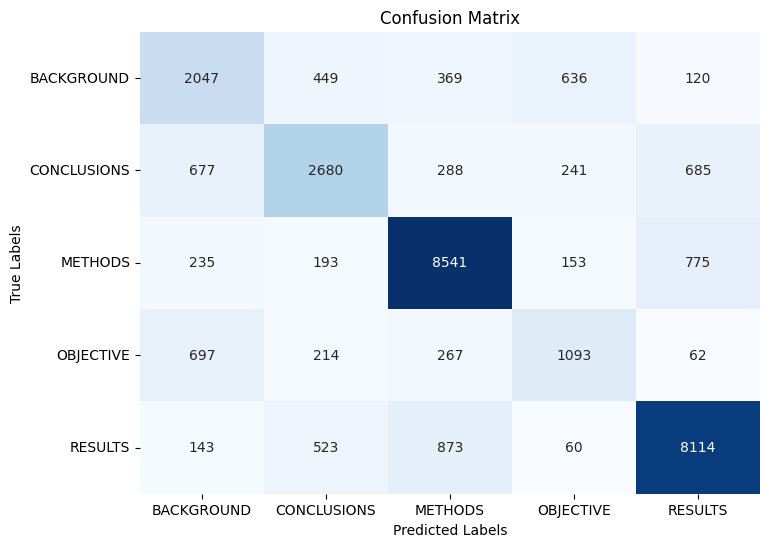

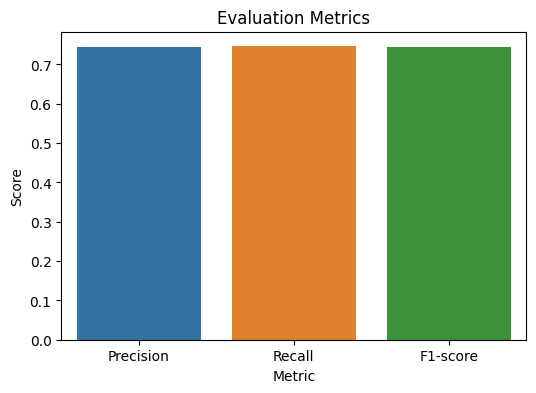

In [ ]:
from sklearn.metrics import precision_recall_fscore_support

# Plotting additional evaluation metrics
def plot_evaluation_metrics(test_labels, test_predictions):

    decoded_test_labels = label_encoder.inverse_transform(test_labels)
    decoded_test_predictions = label_encoder.inverse_transform(test_predictions)

    # Get the unique label names
    label_names = label_encoder.classes_

    # Calculate the confusion matrix
    conf_matrix = confusion_matrix(decoded_test_labels, decoded_test_predictions)

    # Plot the confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False,
                xticklabels=label_names, yticklabels=label_names)
    plt.title("Confusion Matrix")
    plt.xlabel("Predicted Labels")
    plt.ylabel("True Labels")
    plt.show()  


    # Plotting precision, recall, and F1-score
    precision, recall, f1, _ = precision_recall_fscore_support(test_labels, test_predictions, average='weighted')

    metrics_df = pd.DataFrame({'Metric': ['Precision', 'Recall', 'F1-score'],
                               'Score': [precision, recall, f1]})
    
    plt.figure(figsize=(6, 4))
    sns.barplot(x='Metric', y='Score', data=metrics_df)
    plt.title('Evaluation Metrics')
    plt.xlabel('Metric')
    plt.ylabel('Score')
    plt.show()

plot_evaluation_metrics(test_labels, test_predictions)